# Data Visualization of American Community Survey Dataset

The dataset can be found on this link, https://docs.google.com/spreadsheets/d/1vfRviO-nr1HFTfAEhtp2rK8SUfCqULA4sANQNR30g3M/edit?usp=sharing.
The dataset has 4, 999 observations and 14 columns. 

## Data Visualization

Data can be visualized in different methods: line, scatter, bar, histogram, pie

In [461]:

# Importing pandas, numpy and matplotlip

import pandas as pd
import numpy as np


import re
from pprint import pprint
import scipy.stats as stats
import math

import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

## Loading the Data

In [462]:
df = pd.read_csv('./dataset/american_community_survey.csv')

## Checking the shape of the data

In [463]:
df.shape

(4999, 14)

## Checking the first few records

In [464]:
df.head(10)

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
0,39,State-gov,Bachelors,13,Never-married,Administrative / clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Unincorporated self employment,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,High school graduation,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married civilian spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married civilian spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married civilian spouse,Executive / managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Unincorporated self employment,High school graduation,9,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Checking the last few records

In [465]:
df.tail(10)

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
4989,52,Private,Vocational association,11,Separated,Executive / managerial,Unmarried,Black,Female,0,0,60,United-States,<=50K
4990,33,Unincorporated self employment,Academic association,12,Divorced,Sales,Not-in-family,White,Male,0,0,60,United-States,<=50K
4991,29,Private,9th,5,Married civilian spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
4992,23,Private,High school graduation,9,Married civilian spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
4993,23,Private,Some-college,10,Never-married,Executive / managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
4994,39,Private,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,60,United-States,<=50K
4995,43,Private,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,High school graduation,9,Married civilian spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Incorporated self employment,High school graduation,9,Married civilian spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,26,Private,High school graduation,9,Never-married,Administrative / clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


## Getting information about the data

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  4999 non-null   int64 
 1   Work class           4999 non-null   object
 2   Education            4999 non-null   object
 3   Level of education   4999 non-null   int64 
 4   Marital status       4999 non-null   object
 5   Occupation           4999 non-null   object
 6   Relationship         4999 non-null   object
 7   Race                 4999 non-null   object
 8   Sex                  4999 non-null   object
 9   Capital gain         4999 non-null   int64 
 10  Capital loss         4999 non-null   int64 
 11  Work hours per week  4999 non-null   int64 
 12  Native country       4999 non-null   object
 13  Annual income        4999 non-null   object
dtypes: int64(5), object(9)
memory usage: 546.9+ KB


## Descriptive Statistics

In [467]:
df.describe()

,Age,Level of education,Capital gain,Capital loss,Work hours per week
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,38.596319,10.079616,1033.846969,93.715543,40.516103
std,13.593285,2.535159,7052.492345,410.840375,12.108672
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2547.000000,99.000000


## Getting the columns or fields or attributes of the dataset

In [468]:
df.columns

Index(['Age', 'Work class', 'Education', 'Level of education',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital gain', 'Capital loss', 'Work hours per week', 'Native country',
       'Annual income'],
      dtype='object')

In [469]:
len(df.columns)

14

## Visualization using Graphs

### Gender

In [470]:
gender = df['Sex'].value_counts().sort_values()
x_g = gender.index
y_g = gender.values

In [498]:
gender

Female    1628
Male      3371
Name: Sex, dtype: int64

In [501]:
women_pec = (1628 / df.shape[0]) * 100
women_pec

32.56651330266053

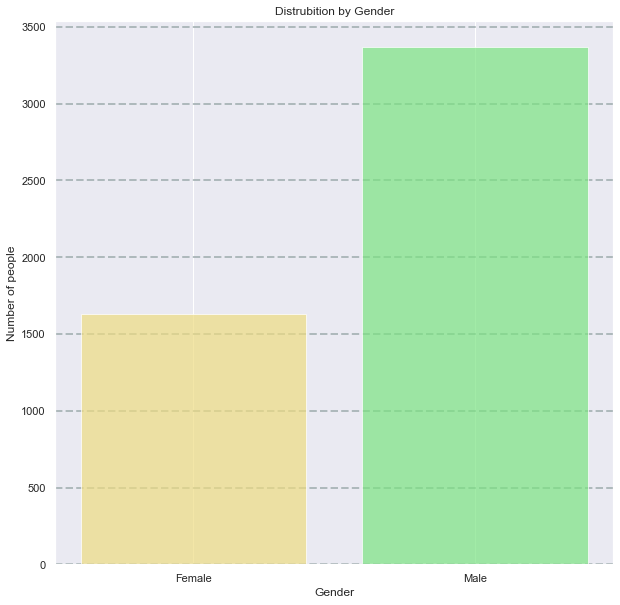

In [471]:
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Distrubition by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
# plt.legend(indexes)
plt.bar(x_g, y_g,color=['#eedc82','#7be382'],  alpha=0.7)
plt.savefig('./graphs/gender.png')
plt.show()

In [505]:
a_income = df['Annual income'].value_counts()
print(a_income)
print((1221 / df.shape[0]) * 100)
a_income = a_income.sort_values()

<=50K    3778
>50K     1221
Name: Annual income, dtype: int64
24.424884976995397


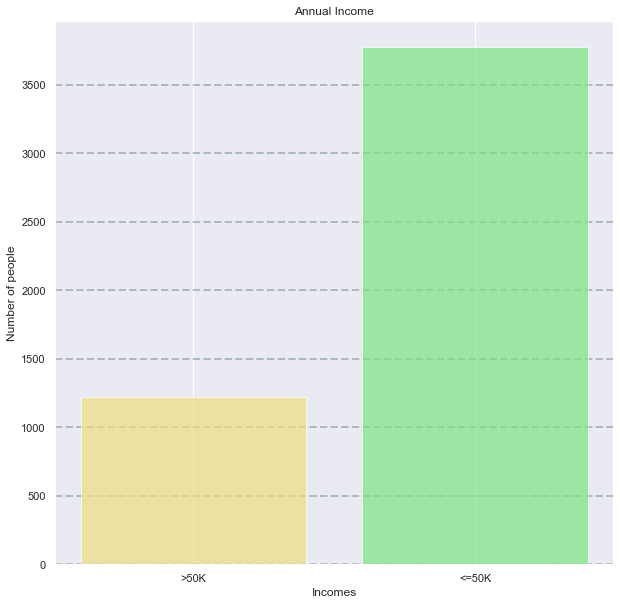

In [506]:
a_income = df['Annual income'].value_counts().sort_values()
x_ai = a_income.index
y_ai = a_income.values

plt.title('Annual Income')
plt.xlabel('Incomes')
plt.ylabel('Number of people')
# plt.legend(indexes)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.bar(x_ai, y_ai,alpha=0.7, color=['#eedc82', '#7be382'])
plt.savefig('./graphs/annual_income.png')
plt.show()


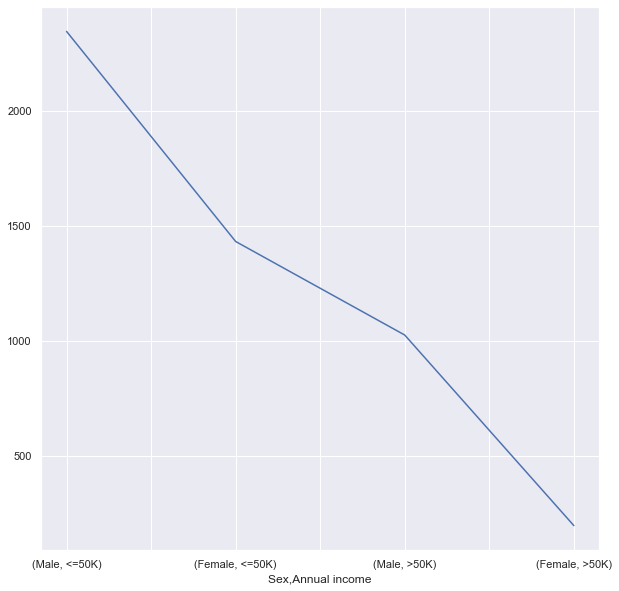

In [507]:
df[['Sex','Annual income']].value_counts().plot(kind='line')
plt.show()

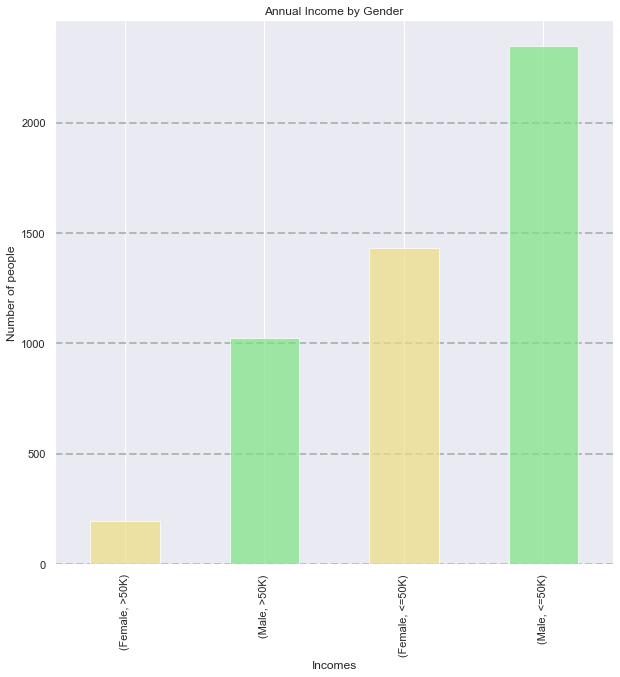

In [508]:
df[['Sex','Annual income']].value_counts().sort_values().plot(kind='bar', color=['#eedc82', '#7be382'], alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('Annual Income by Gender')
plt.xlabel('Incomes')
plt.ylabel('Number of people')
plt.savefig('./graphs/anual_income_by_gender.png')
plt.show()

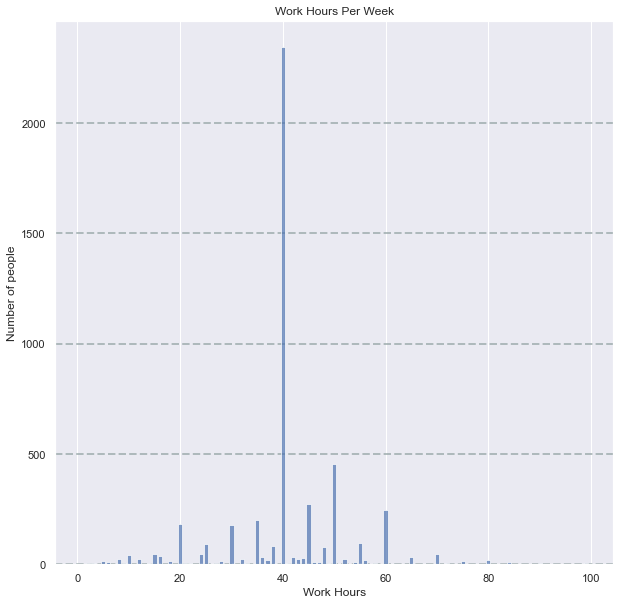

In [475]:
df_whw = df['Work hours per week'].value_counts().sort_values()
x_whw = list(df_whw.index)
y_whw = list(df_whw.values)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('Work Hours Per Week')
plt.xlabel('Work Hours')
plt.ylabel('Number of people')
plt.bar(x_whw, y_whw, alpha=0.7)
plt.savefig('./graphs/work_hours_per_week.png')
plt.show()

In [476]:
# df.groupby('Native country').count()
df[df['Work hours per week'] > 40]

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
7,52,Unincorporated self employment,High school graduation,9,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
10,37,Private,Some-college,10,Married civilian spouse,Executive / managerial,Husband,Black,Male,0,0,80,United-States,>50K
13,32,Private,Academic association,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
15,34,Private,7th-8th,4,Married civilian spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,43,Incorporated self employment,Some-college,10,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,50,United-States,>50K
4989,52,Private,Vocational association,11,Separated,Executive / managerial,Unmarried,Black,Female,0,0,60,United-States,<=50K
4990,33,Unincorporated self employment,Academic association,12,Divorced,Sales,Not-in-family,White,Male,0,0,60,United-States,<=50K
4994,39,Private,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,60,United-States,<=50K


In [477]:
work_class = df['Work class'].value_counts()

In [478]:
# a_income = df['Annual income'].value_counts()
# x_wc = work_class.index
# y_wc = work_class.values
# plt.rcParams["figure.figsize"] = (25,10)
# plt.title('Work Class')
# plt.xlabel('Class')
# plt.ylabel('Number of people')
# # plt.legend(indexes)
# plt.bar(x_wc, y_wc)
# plt.savefig('./graphs/work_class.png')
# plt.show()

In [479]:
# df.groupby('Native country').count()
df[df['Work hours per week'] > 40].shape

(1490, 14)

In [480]:
df.groupby('Native country').count().iloc[:,1].sort_values()

Native country
Scotland                         1
Hong                             1
Yugoslavia                       2
Thailand                         2
Laos                             2
Peru                             3
Outlying-US(Guam-USVI-etc)       3
Honduras                         3
France                           3
Trinadad&Tobago                  4
Ireland                          4
Ecuador                          4
Cambodia                         4
Nicaragua                        5
Columbia                         5
Greece                           6
Haiti                            6
Portugal                         7
Poland                           9
Japan                            9
South                            9
Taiwan                          10
Guatemala                       10
Vietnam                         10
Iran                            11
Italy                           12
India                           12
Dominican-Republic              13
Cuba 

In [481]:
df.columns

Index(['Age', 'Work class', 'Education', 'Level of education',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital gain', 'Capital loss', 'Work hours per week', 'Native country',
       'Annual income'],
      dtype='object')

In [482]:
df['Native country'].value_counts()

United-States                 4464
Mexico                         104
?                               97
Canada                          28
Germany                         22
Philippines                     22
Puerto-Rico                     16
El-Salvador                     16
England                         16
Jamaica                         15
China                           15
Cuba                            14
Dominican-Republic              13
Italy                           12
India                           12
Iran                            11
Vietnam                         10
Guatemala                       10
Taiwan                          10
Poland                           9
Japan                            9
South                            9
Portugal                         7
Haiti                            6
Greece                           6
Nicaragua                        5
Columbia                         5
Ireland                          4
Ecuador             

In [483]:
df.groupby('Education').count()

,Age,Work class,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
Education,,,,,,,,,,,,,
10th,145,145,145,145,145,145,145,145,145,145,145,145,145
11th,199,199,199,199,199,199,199,199,199,199,199,199,199
12th,55,55,55,55,55,55,55,55,55,55,55,55,55
1st-4th,22,22,22,22,22,22,22,22,22,22,22,22,22
5th-6th,43,43,43,43,43,43,43,43,43,43,43,43,43
7th-8th,99,99,99,99,99,99,99,99,99,99,99,99,99
9th,78,78,78,78,78,78,78,78,78,78,78,78,78
Academic association,164,164,164,164,164,164,164,164,164,164,164,164,164
Bachelors,832,832,832,832,832,832,832,832,832,832,832,832,832


In [484]:
df['Marital status']

0                 Never-married
1       Married civilian spouse
2                      Divorced
3       Married civilian spouse
4       Married civilian spouse
                 ...           
4994    Married civilian spouse
4995              Never-married
4996    Married civilian spouse
4997    Married civilian spouse
4998              Never-married
Name: Marital status, Length: 4999, dtype: object

In [485]:
df['Level of education'].compare(df['Education'], align_axis=0)

0     self                         13
      other                 Bachelors
1     self                         13
      other                 Bachelors
2     self                          9
                        ...          
4996  other    High school graduation
4997  self                          9
      other    High school graduation
4998  self                          9
      other    High school graduation
Length: 9998, dtype: object

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  4999 non-null   int64 
 1   Work class           4999 non-null   object
 2   Education            4999 non-null   object
 3   Level of education   4999 non-null   int64 
 4   Marital status       4999 non-null   object
 5   Occupation           4999 non-null   object
 6   Relationship         4999 non-null   object
 7   Race                 4999 non-null   object
 8   Sex                  4999 non-null   object
 9   Capital gain         4999 non-null   int64 
 10  Capital loss         4999 non-null   int64 
 11  Work hours per week  4999 non-null   int64 
 12  Native country       4999 non-null   object
 13  Annual income        4999 non-null   object
dtypes: int64(5), object(9)
memory usage: 546.9+ KB


In [487]:
df.head()

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
0,39,State-gov,Bachelors,13,Never-married,Administrative / clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Unincorporated self employment,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,High school graduation,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married civilian spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married civilian spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [488]:
df_edu_deg = df[(df['Education'] == 'Bachelors') | (df['Education'] == 'Masters') |  (df['Education'] == 'Doctorate')]
df_edu_deg.head()

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
0,39,State-gov,Bachelors,13,Never-married,Administrative / clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Unincorporated self employment,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,Bachelors,13,Married civilian spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married civilian spouse,Executive / managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [489]:
df_edu_deg['Education'].value_counts()

Bachelors    832
Masters      252
Doctorate     56
Name: Education, dtype: int64

In [490]:
values = df_edu_deg['Education'].value_counts().values
print(list(values))

[832, 252, 56]


In [509]:
np.array([832, 252, 56]) * (100/df.shape[0])

array([16.64332867,  5.0410082 ,  1.12022404])

In [491]:
indexes = df_edu_deg['Education'].value_counts().index
print(list(indexes))

['Bachelors', 'Masters', 'Doctorate']


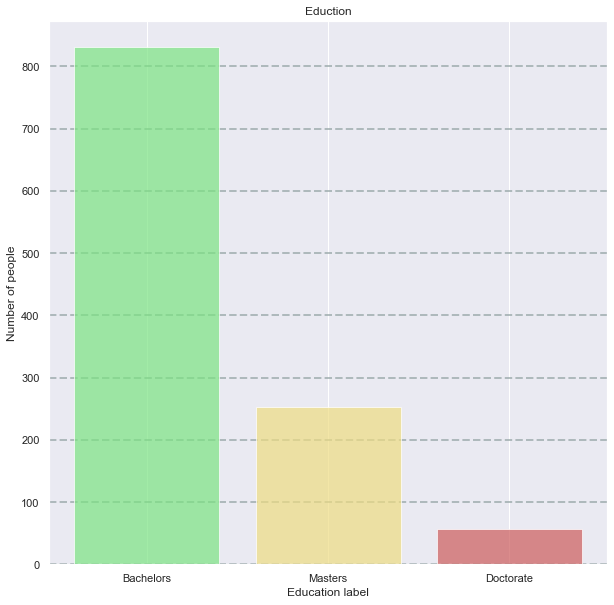

In [492]:
plt.title('Eduction')
plt.xlabel('Education label')
plt.ylabel('Number of people')
# plt.legend(indexes)
plt.bar(indexes, values,color=['#7be382','#eedc82', '#cd5c5c'], alpha = 0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.savefig('./graphs/education.png')
plt.show()

In [493]:
df['Sex'].value_counts()

Male      3371
Female    1628
Name: Sex, dtype: int64

In [494]:
# def draw_bar_graph (dct):
#     plt.title(dct['title'])
#     plt.xlabel(dct['xlabel'])
#     plt.ylabel(d['ylabel'])
#     plt.bar(indexes, values,color=dct['colors'])

# dct = {
#     title:'Title',
#     xlabel:'xlabel',
#     ylabel:'ylabel',
#     color:['r']
#     x:x,
#     y:y
# }

In [495]:
df_edu_deg.head()

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
0,39,State-gov,Bachelors,13,Never-married,Administrative / clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Unincorporated self employment,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,Bachelors,13,Married civilian spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married civilian spouse,Executive / managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [496]:
df_edu_deg_m = df_edu_deg[df_edu_deg['Sex'] == 'Male']
df_edu_deg_f = df_edu_deg[df_edu_deg['Sex'] == 'Female']

print(df_edu_deg_m.shape)
print(df_edu_deg_f.shape)


(826, 14)
(314, 14)


Index(['Bachelors', 'Masters', 'Doctorate'], dtype='object')


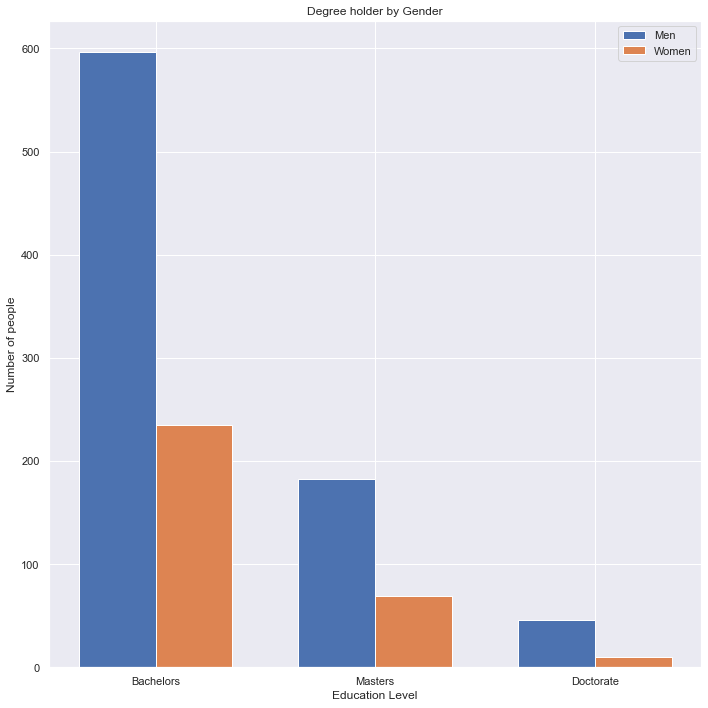

In [497]:
deg_males = df_edu_deg_m['Education'].value_counts().values
deg_females = df_edu_deg_f['Education'].value_counts().values
print(df_edu_deg_f['Education'].value_counts().index)

labels = list(df_edu_deg_f['Education'].value_counts().index)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, deg_males, width, label='Men')
rects2 = ax.bar(x + width/2, deg_females, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of people')
ax.set_xlabel('Education Level')
ax.set_title('Degree holder by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.savefig('./graphs/degree_holder_gender.png')
plt.show()

 ### Conclusions
The dataset has 1628 women and 3371 men. The proportion of women in the data set is 32%.  According to this dataset, 24.4% of the people get more than 50K annually. Most of the people work 40 hours per week. 
In terms of education,  education level is as follows: 16.7% Bachelors, 5.04% Masters, and 1.12% Doctorate . The number of women that have degrees are much lower than the number of mens. The graphical representation of this result has been attached as an image. 
